In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2FkYi9zdHVmZi9naXRjbG9uZXMvU3VpY2lkZV9Qcm9qZWN0L2RvY3M='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Users/adb/.local/share/uv/python/cpython-3.11.11-macos-aarch64-none/lib/python3.11/importlib/_bootstrap.py": 1742417699.9034283, "/Users/adb/.local/share/uv/python/cpython-3.11.11-macos-aarch64-none/lib/python3.11/importlib/_bootstrap_external.py": 1742417699.9252732, "/Users/adb/.local/share/uv/python/cpython-3.11.11-macos-aarch64-none/lib/python3.11/zipimport.py": 1742417704.5383377, "/Users/adb/.local/share/uv/python/cpython-3.11.11-macos-aarch64-none/lib/python3.11/codecs.py": 1742417695.0235548, "/Users/adb/.local/share/uv/python/cpython-3.11.11-macos-aarch64-none/lib/python3.11/encodings/aliases.py": 1742417696.0882556, "/Users/adb/.local/share/uv/python/cpython-3.11.11-macos-aarch64-none/lib/python3.11/encodings/__init__.py": 1742417696.0866225, "/Users/adb/.local/share/uv/python/cpython-3.11.11-macos-aarch64-none/lib/python3.11/encodings/utf_8.py": 1742417696.228352, "/Users/adb/.local/share/uv/python/cpython-3.11.11-macos-aarch64-none/lib/python3.11/abc.py": 1742417694.5547

In [2]:
import sys
import itertools
from pathlib import Path
from typing import Dict, List
from itables import show
from IPython.display import Markdown
src_path = Path("../src/dt-distance").resolve()
data_path = Path("../data").resolve()
sys.path.append(str(data_path))
sys.path.append(str(src_path))

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from dt_distance.distance_calculator import DistanceCalculator
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(42)

In [3]:
#| echo: True
DEPTHS = list(range(3, 13))
MIN_SAMPLES = [3, 5, 10, 30, 50]

NUM_BOOTSTRAPS = 25
DATA_PATH = "../data/DataSet_Combined_SI_SNI_Baseline_FE.csv"

FEATURE_SETS: Dict[str, List[str]] = {
    "suicidea": [
        "age", "gender", "sexori", "raceall", "trauma_sum", "cesd_score", "harddrug_life", "school", "degree", "job", "sex", "concurrent", "exchange", "children", "weapon", "fight", "fighthurt", "ipv", "ptsd_score", "alcfirst", "potfirst", "staycurrent", "homelage", "time_homeless_month", "jail", "jailkid", "gettherapy", "sum_alter", "sum_family", "sum_home_friends", "sum_street_friends", "sum_unknown_alter", "sum_talk_once_week", "sum_alter3close", "prop_family_harddrug", "prop_friends_harddrug", "prop_friends_home_harddrug", "prop_friends_street_harddrug", "prop_alter_all_harddrug", "prop_enc_badbehave", "prop_alter_homeless", "prop_family_emosup", "prop_friends_emosup", "prop_friends_home_emosup", "prop_friends_street_emosup", "prop_alter_all_emosup", "prop_family_othersupport", "prop_friends_othersupport", "prop_friends_home_othersupport", "prop_friends_street_othersupport", "prop_alter_all_othersupport", "sum_alter_staff", "prop_object_badbehave", "prop_enc_goodbehave", "prop_alter_school_job", "sum_alter_borrow"],
    "suicattempt": [
        "age", "gender", "sexori", "raceall", "trauma_sum", "cesd_score", "harddrug_life", "school", "degree", "job", "sex", "concurrent", "exchange", "children", "weapon", "fight", "fighthurt", "ipv", "ptsd_score", "alcfirst", "potfirst", "staycurrent", "homelage", "time_homeless_month", "jail", "jailkid", "gettherapy", "sum_alter", "prop_family", "prop_home_friends", "prop_street_friends", "prop_unknown_alter", "sum_talk_once_week", "sum_alter3close", "prop_family_harddrug", "prop_friends_harddrug", "prop_friends_home_harddrug", "prop_friends_street_harddrug", "prop_alter_all_harddrug", "prop_enc_badbehave", "prop_alter_homeless", "prop_family_emosup", "prop_friends_emosup", "prop_friends_home_emosup", "prop_friends_street_emosup", "prop_alter_all_emosup", "prop_family_othersupport", "prop_friends_othersupport", "prop_friends_home_othersupport", "prop_friends_street_othersupport", "prop_alter_all_othersupport", "sum_alter_staff", "prop_object_badbehave", "prop_enc_goodbehave", "prop_alter_school_job", "sum_alter_borrow"],
}

MODEL_PARAMS = {
    "suicidea": dict(min_samples_leaf=10, min_samples_split=20, max_depth=4),
    "suicattempt": dict(min_samples_leaf=10, min_samples_split=30, max_depth=4),
}

LABELS = ["suicidea", "suicattempt"]

In [4]:
#| label: import-data
#| echo: true
def prepare_data(df: pd.DataFrame, features: List[str], label: str):
    df = df.replace('NaN', pd.NA)  # replace the string 'NaN' with actual NaN values
    df_full_cleaned = df[features + [label]].dropna().copy()
    X = df_full_cleaned[features]
    y = df_full_cleaned[label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
    X_full = df_full_cleaned[features]
    y_full = df_full_cleaned[label]
    return X_full, y_full, X_train, X_test, y_train, y_test

df = pd.read_csv(DATA_PATH)
X_full, y_full, X_train, X_test, y_train, y_test = prepare_data(df, FEATURE_SETS["suicidea"], "suicidea")

In [5]:
#| echo: false
print(f"Number of samples in the full dataset: {len(X_full)}")
print(f"Number of samples in the training set: {len(X_train)}")
print(f"Number of samples in the test set: {len(X_test)}")
print(f"Shape of training set: {X_train.shape}")

Number of samples in the full dataset: 586
Number of samples in the training set: 439
Number of samples in the test set: 147
Shape of training set: (439, 56)


In [6]:
#! echo: true
show(X_train, searching = False, paging = True,ordering = False, autoWidth = True)

In [7]:
#| label: train-test-split
#| echo: true
def random_train_split(X, y):
    N = X.shape[0]
    indices = np.random.permutation(N)
    X0, y0 = X[indices[:N // 2]], y[indices[:N // 2]]
    return X0, y0

X0, y0 = random_train_split(X_train.values, y_train.values)
X0.shape, y0.shape

((219, 56), (219,))

In [8]:
#| echo: true
#| code-line-numbers: "|6,7|10|11,12"
def train_decision_tree(X, y, depth, min_samples_leaf):
    clf = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=min_samples_leaf)
    clf.fit(X, y)
    return clf

def bootstrap_trees(X, y, depths, min_samples, B):
    # Create B bootstrap trees by sampling with replacement from X_0
    trees = []
    for _ in range(B):
        X_sample, y_sample = resample(X, y, replace=True)
        depth = np.random.choice(depths)
        min_leaf = np.random.choice(min_samples)
        tree = train_decision_tree(X_sample, y_sample, depth, min_leaf)
        trees.append(tree)
    return trees

In [9]:
#| echo: true
T0 = bootstrap_trees(X0, y0, DEPTHS, MIN_SAMPLES, NUM_BOOTSTRAPS)
print("Number of trees in T0:", len(T0))

T = bootstrap_trees(X_train.values, y_train.values, DEPTHS, MIN_SAMPLES, NUM_BOOTSTRAPS)
print("Number of trees in T:", len(T))

Number of trees in T0: 25
Number of trees in T: 25


In [10]:
#| eval: false
#| echo: true
#| code-line-numbers: "|5|8,9"
def compute_average_distances(T0, T, X_train, y_train):
    X_train_values = X_train.values if hasattr(X_train, 'values') else X_train
    
    distances = []
    for i, tree_b in enumerate(T):
        d_b = 0.0
        for tree_beta in T0:
            distance_calculator = DistanceCalculator(tree_beta, tree_b, X=X_train_values, y=y_train)
            d_b += distance_calculator.compute_tree_distance()
        d_b /= len(T0)
        distances.append(d_b)
    
    return distances
distances = compute_average_distances(T0, T, X_train, y_train)

In [11]:
#| eval: true
# load the distances from a csv
distances = []
with open("distances.csv", "r") as f:
    for line in f:
        distances.append(float(line.strip()))

In [12]:
#| eval: false
# save the distances into a csv
with open("distances.csv", "w") as f:
    for distance in distances:
        f.write(f"{distance}\n")

In [13]:
#| echo: true
def evaluate_predictive_power(trees, X_holdout, y_holdout):
    auc_scores = []
    for tree in trees:
        y_prob = tree.predict_proba(X_holdout)[:, 1]
        auc = roc_auc_score(y_holdout, y_prob)
        auc_scores.append(auc)
    return auc_scores

auc_scores = evaluate_predictive_power(T, X_test.values, y_test.values)
print("Average AUC score:", np.mean(auc_scores))

Average AUC score: 0.6196503496503497


In [14]:
#| echo: true
#| code-line-numbers: "|5,6"
def pareto_optimal_trees(distances, auc_scores):
    pareto_trees = []
    for i, (d_i, a_i) in enumerate(zip(distances, auc_scores)):
        dominated = False
        for j, (d_j, a_j) in enumerate(zip(distances, auc_scores)):
            if i != j and ((d_j <= d_i and a_j > a_i) or (d_j < d_i and a_j >= a_i)):
                dominated = True
                break
        if not dominated:
            pareto_trees.append(i)
    return pareto_trees

pareto_trees = pareto_optimal_trees(distances, auc_scores)
print("Number of Pareto optimal trees:", len(pareto_trees))

Number of Pareto optimal trees: 6


In [15]:
#| echo: true
#| code-line-numbers: "|3"
def select_final_tree(distances, auc_scores, pareto_indices, epsilon=0.01):
    best_auc = max(auc_scores)
    candidates = [i for i in pareto_indices if auc_scores[i] >= (1 - epsilon) * best_auc]
    if not candidates:
        candidates = pareto_indices
    best_idx = max(candidates, key=lambda i: auc_scores[i] - distances[i])
    return best_idx

selected_tree_index = select_final_tree(distances, auc_scores, pareto_trees)
print("Selected tree index:", selected_tree_index)

Selected tree index: 20


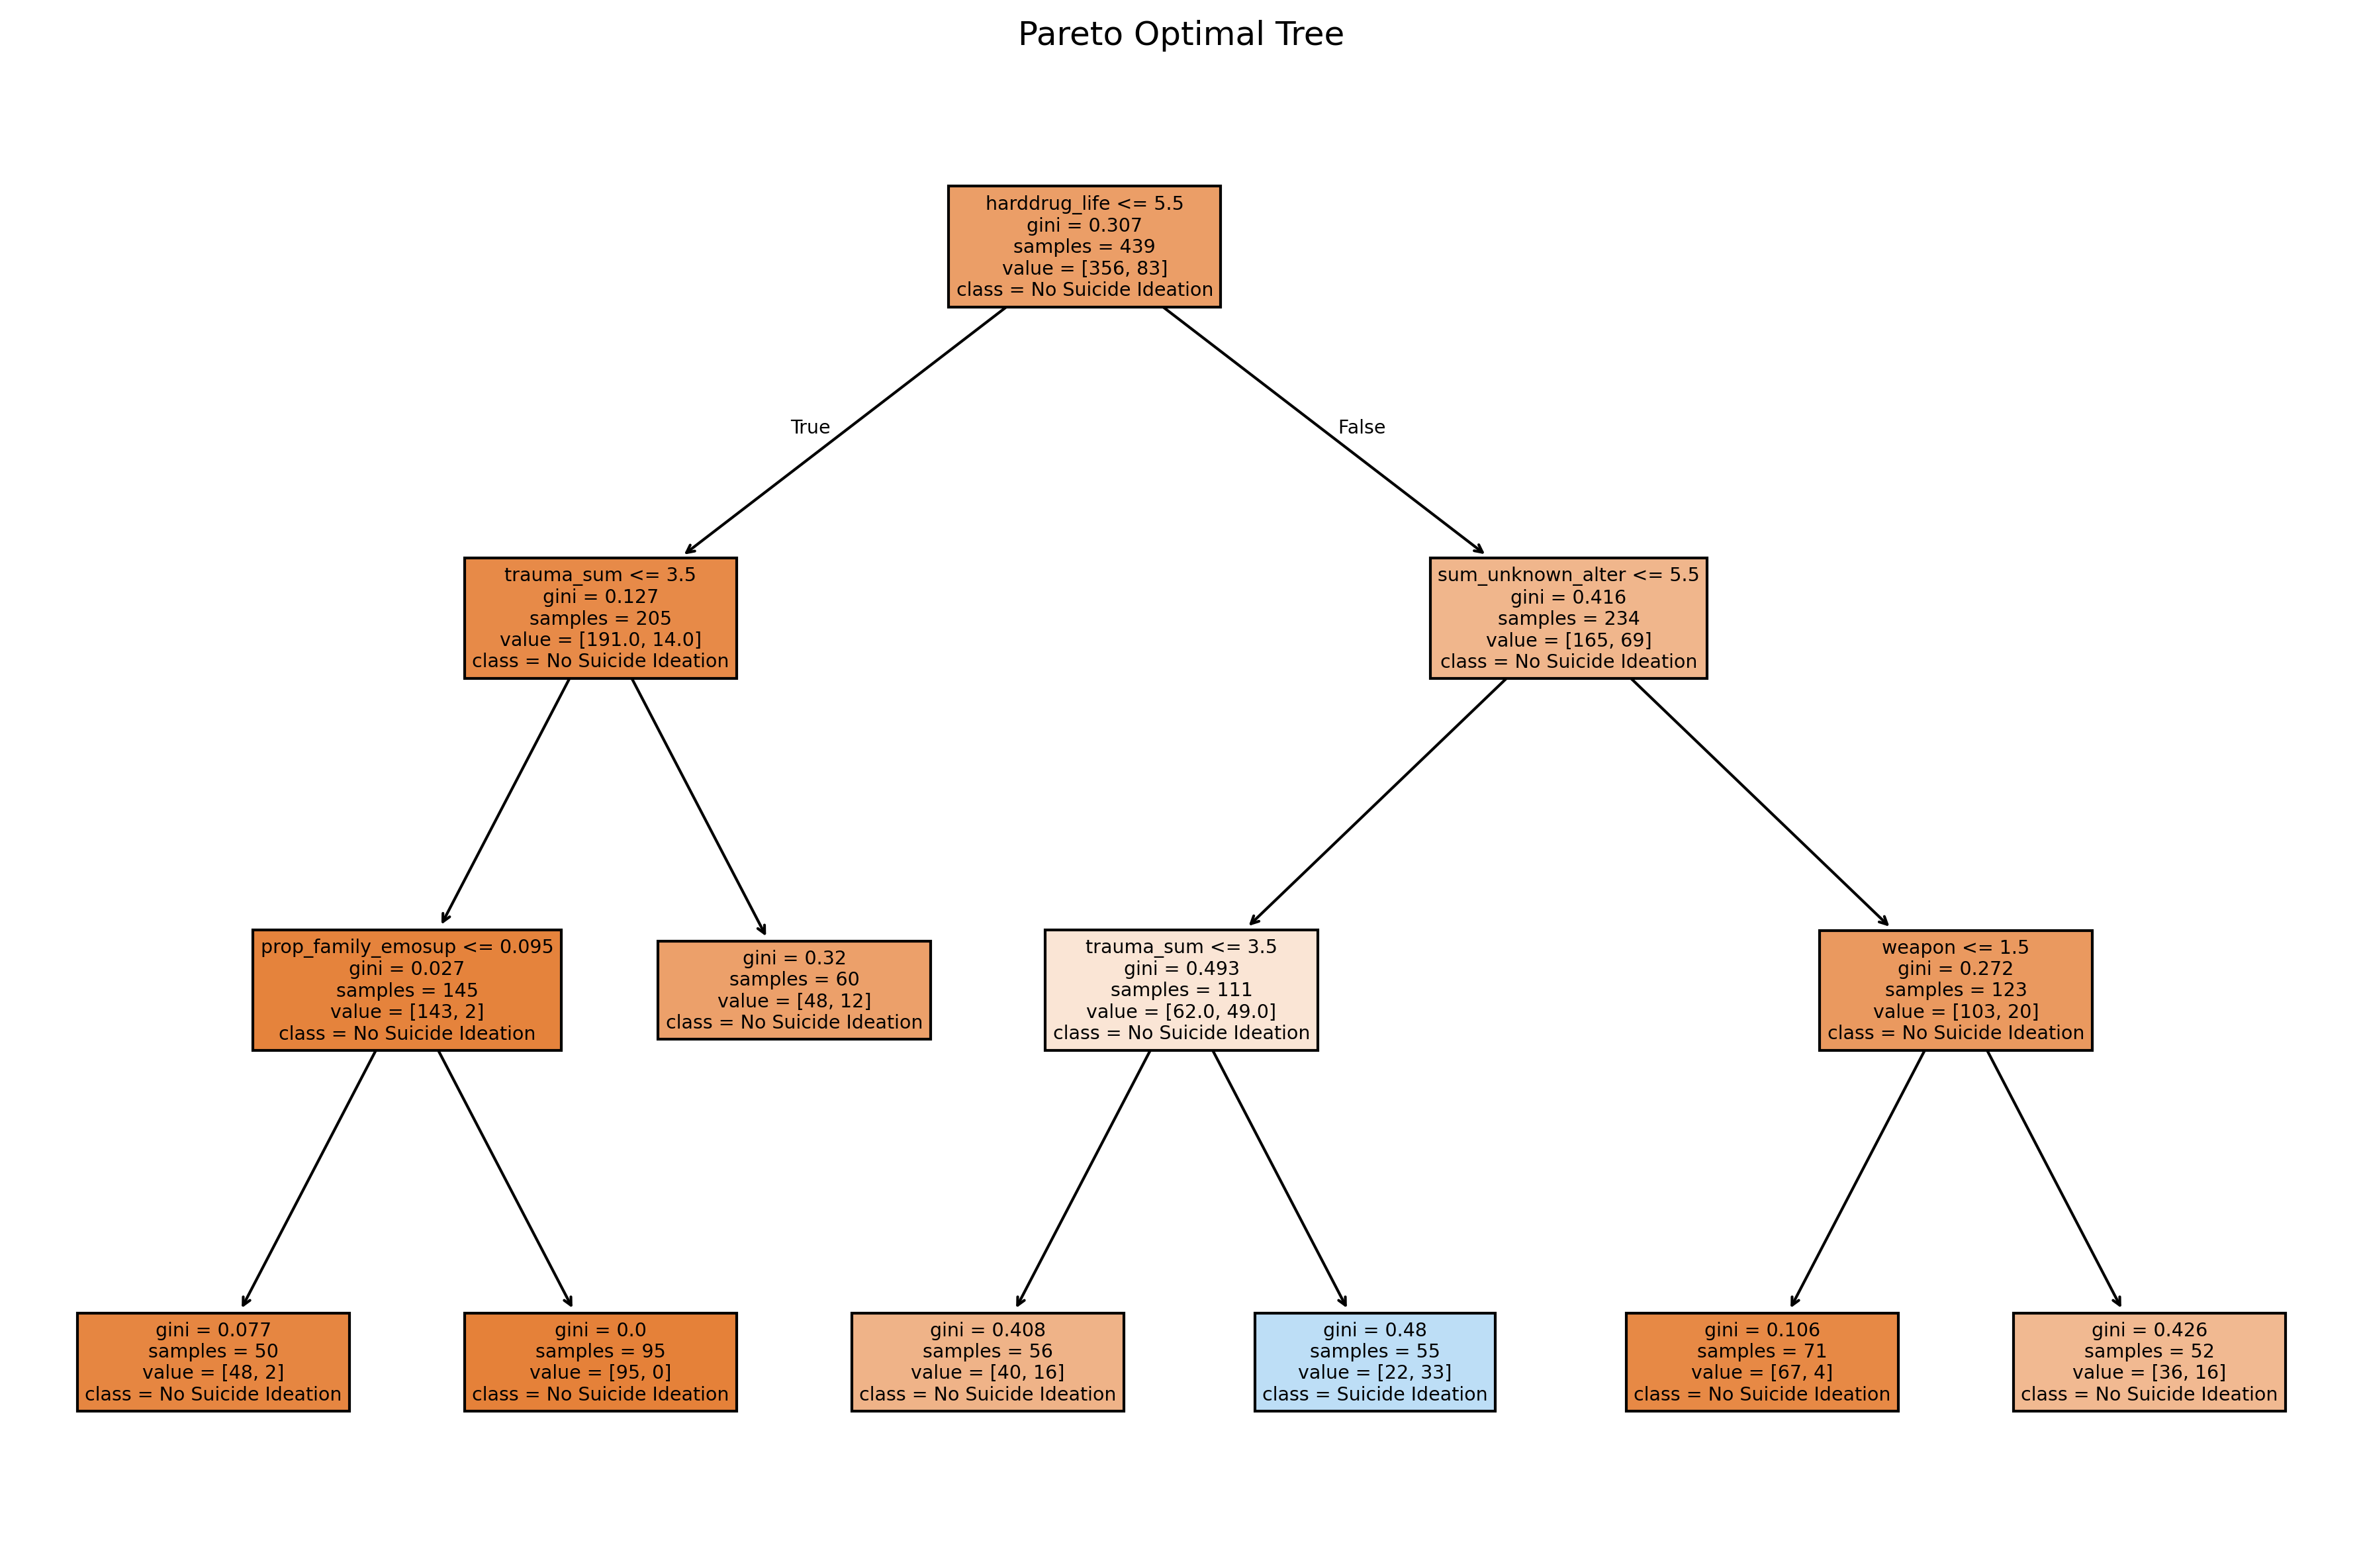

In [16]:
#| label: fig-selected-tree
#| fig-cap: Pareto Optimal Tree for Suicide Ideation Prediction

selected_tree = T[selected_tree_index]
plt.figure(figsize=(12, 8), dpi=300)
plot_tree(selected_tree, 
          feature_names=X_full.columns,
          class_names=["No Suicide Ideation", "Suicide Ideation"],
          filled=True)
plt.title("Pareto Optimal Tree")
plt.tight_layout()

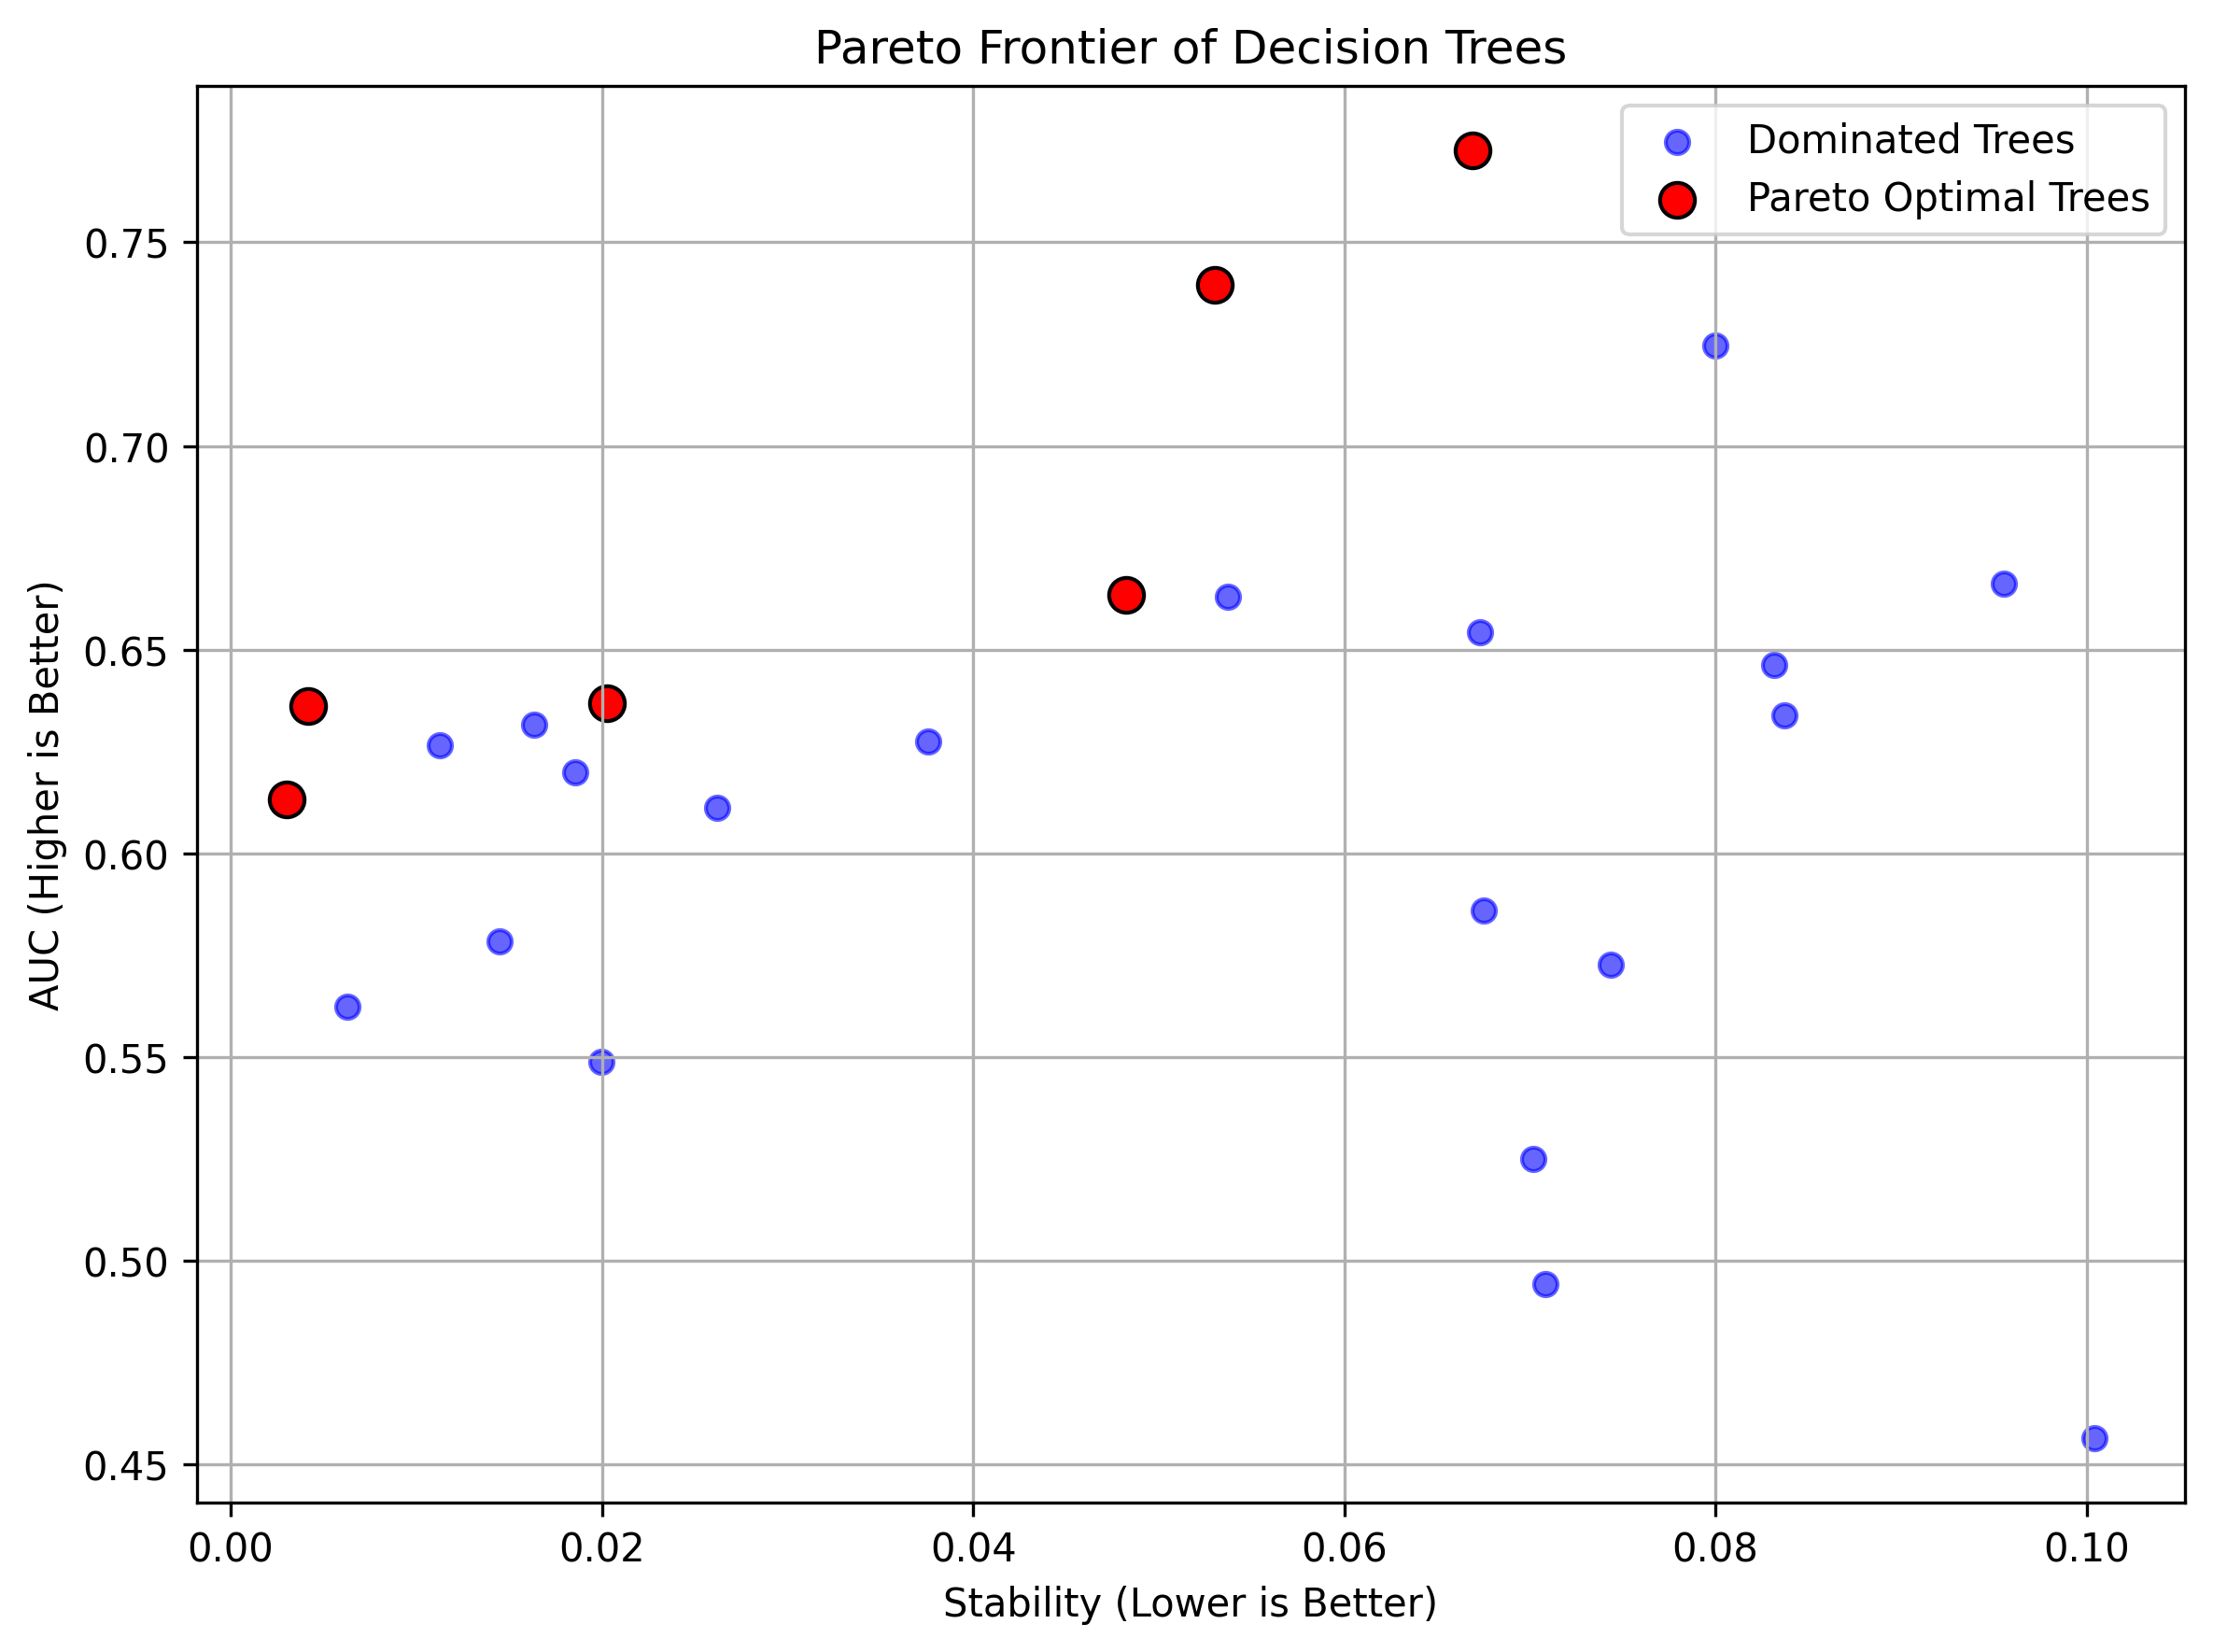

In [17]:
def plot_pareto_frontier(distances, auc_scores, pareto_indices):
    distances = np.array(distances)
    auc_scores = np.array(auc_scores)
    pareto_indices = set(pareto_indices)
    is_pareto = np.array([i in pareto_indices for i in range(len(distances))])
    # Plotting
    plt.figure(figsize=(8, 6), dpi=300)
    plt.scatter(distances[~is_pareto], auc_scores[~is_pareto], c='blue', label='Dominated Trees', alpha=0.6)
    plt.scatter(distances[is_pareto], auc_scores[is_pareto], c='red', edgecolors='black', s=80, label='Pareto Optimal Trees')
    plt.xlabel("Stability (Lower is Better)")
    plt.ylabel("AUC (Higher is Better)")
    plt.title("Pareto Frontier of Decision Trees")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

plot_pareto_frontier(distances, auc_scores, pareto_trees)